<h2>Presentacion de datos</h2>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import contractions
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import PorterStemmer
import seaborn as sb
from sklearn.decomposition import PCA
import plotly.express as px

In [2]:
data = pd.read_csv("data/cleaned_PHMRC_VAI_redacted_free_text.train.csv")
data = data.iloc[:1000, 1:]


In [5]:
data.tail(5)

,module,age,sex,site,open_response,gs_text34
995,Adult,26.0,2,Pemba,respondent explained that deceased had epileps...,Drowning
996,Adult,60.0,1,AP,my husband had diabetics and bp for many years...,Other Infectious Diseases
997,Adult,60.0,1,Mexico,the informant said that the documents cant be ...,Diabetes
998,Neonate,0.0,2,AP,i had fever during my pregnancy inspite our ba...,Preterm Delivery
999,Adult,50.0,1,UP,the deceased had begun suffering abdominal pai...,Renal Failure


<h3>Ver clases presentes y cadencia de cada una</h3>

In [6]:
print(data.groupby('gs_text34').size())

gs_text34
AIDS                                     31
Acute Myocardial Infarction              40
Asthma                                    1
Birth asphyxia                           31
Bite of Venomous Animal                  11
Breast Cancer                             7
COPD                                     12
Cervical Cancer                           2
Cirrhosis                                31
Colorectal Cancer                         7
Congenital malformation                  15
Diabetes                                 34
Diarrhea/Dysentery                       42
Drowning                                 12
Encephalitis                              4
Epilepsy                                  3
Esophageal Cancer                         2
Falls                                    18
Fires                                    24
Hemorrhagic fever                         3
Homicide                                 15
Leukemia/Lymphomas                        9
Lung Cancer           

<h3>Agrupar clases en grupos más grandes</h3>

In [7]:
for i in range(len(data)):
    if data['gs_text34'][i] == 'TB':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'  
    if data['gs_text34'][i] == 'Diarrhea/Dysentery':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Other infectious diseases':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'AIDS':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Sepsis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Meningitis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Meningitis/Sepsis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Malaria':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Encephalitis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Measles':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Hemorrhagic Fever':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'TB':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Leukemia/Lymphomas':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Colorectal Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Lung Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Cervical Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Breast Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Stomach Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Prostate Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Esophageal Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Other Cancers':
        data['gs_text34'][i] = 'Neoplasms'
        
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Diabetes':
        data['gs_text34'][i] = 'Endocrine, Nutritional and Metabolic Diseases'
    
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Epilepsy':
        data['gs_text34'][i] = 'Diseases of the Nervous System'
    
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Stroke':
        data['gs_text34'][i] = 'Diseases of the circulatory system'
    if data['gs_text34'][i] == 'Acute Myocardial Infarction':
        data['gs_text34'][i] = 'Diseases of the circulatory system'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Pneumonia':
        data['gs_text34'][i] = 'Diseases of Respiratory System'
    if data['gs_text34'][i] == 'Asthma':
        data['gs_text34'][i] = 'Diseases of Respiratory System'
    if data['gs_text34'][i] == 'COPD':
        data['gs_text34'][i] = 'Diseases of Respiratory System'

    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Cirrhosis':
        data['gs_text34'][i] = 'Diseases of the Digestive System'
    if data['gs_text34'][i] == 'Other Digestive Diseases':
        data['gs_text34'][i] = 'Diseases of the Digestive System'
    
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Renal Failure':
        data['gs_text34'][i] = 'Diseases of the Genitourinary System'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Preterm Delivery':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
    if data['gs_text34'][i] == 'Stillbirth':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
    if data['gs_text34'][i] == 'Maternal':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
    if data['gs_text34'][i] == 'Birth Asphyxia':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
        
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Congenital Malformations':
        data['gs_text34'][i] = 'Congenital Malformations'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Bite of Venomous Animal':
        data['gs_text34'][i] = 'Injury, Poisoning and External Causes'
    if data['gs_text34'][i] == 'Poisonings':
        data['gs_text34'][i] = 'Injury, Poisoning and External Causes'
        
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Road Traffic':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Falls':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Homicide':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Fires':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Drowning':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Suicide':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Violent Death':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Other Injuries':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'

/tmp/ipykernel_6334/2546714229.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gs_text34'][i] = 'Diseases of Respiratory System'
/tmp/ipykernel_6334/2546714229.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
/tmp/ipykernel_6334/2546714229.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gs_text34'][i] = 'External Causes of Morbidity and Mortalit

In [8]:
print(data.groupby('gs_text34').size())
print('________________________________________________________')
print('Numero de enfermedades: ' + str(len(np.unique(data['gs_text34']))))

gs_text34
Birth asphyxia                                    31
Certain infectious and Parasitic Diseases        130
Congenital malformation                           15
Diseases of Respiratory System                   115
Diseases of the Digestive System                  35
Diseases of the Genitourinary System              35
Diseases of the Nervous System                     3
Diseases of the circulatory system               106
Endocrine, Nutritional and Metabolic Diseases     34
External Causes of Morbidity and Mortality       140
Hemorrhagic fever                                  3
Injury, Poisoning and External Causes             20
Neoplasms                                         39
Other Cardiovascular Diseases                     39
Other Defined Causes of Child Deaths              10
Other Infectious Diseases                         40
Other Non-communicable Diseases                   54
Pregnancy, childbirth and the puerperiu          151
dtype: int64
_______________________

<hr>

<h1>PreProcesamiento</h1>

<h3>0. Traducir a español</h3>

In [9]:
from time import sleep
import concurrent.futures
import goslate

executor = concurrent.futures.ThreadPoolExecutor(max_workers=1)
gs = goslate.Goslate(service_urls=['http://translate.google.de'], executor=executor)

def traducir_ing2esp(txt):
    return gs.translate(txt, 'es') 

def traducir_esp2ing(txt):
    return gs.translate(txt, 'en') 

<h2>1. Pasar a minusculas el texto</h2>

In [10]:
def to_minusculas(txt):
    return txt.lower()

In [11]:
data["open_response"] = data["open_response"].str.lower()
data.head(5)

#data_esp["open_response"] = data_esp["open_response"].str.lower()
#data_esp.head(5)

,module,age,sex,site,open_response,gs_text34
0,Adult,65.0,1,Bohol,date he felt a lower back pain and had fever s...,Diseases of Respiratory System
1,Child,0.0,2,Dar,the caese of death is pneumonia,Diseases of Respiratory System
2,Adult,23.0,2,AP,i took my wife to a private hospital for tubec...,"Pregnancy, childbirth and the puerperiu"
3,Adult,40.0,1,AP,he went to the work on sunday there were # iro...,External Causes of Morbidity and Mortality
4,Adult,55.0,1,UP,the deceased had died due to a snake bite the ...,"Injury, Poisoning and External Causes"


<h2>2. Quitar marcas de puntuacion</h2>

In [11]:
def quitar_marcasPuntuacion(text:str):
    return text.translate(str.maketrans('', '', string.punctuation))

In [13]:
print(data["open_response"][45])

my mother suffered from fever continuously for # months she was treated in hospital where the doctor prescribed medicines but fever did not control later she was taken to hospital since the treatment was so expensive in the hospital the doctor advised us to take her to hospital but we did not take her to hospital but took her to hospital and admitted there since stains were present all over the body the doctors were firm to see the test results on the stains to proceed further on treatment by that time they were not specific to name the disease she was dead when the treatment was going on


In [14]:
data["open_response"] = data["open_response"].apply(lambda txt: quitar_marcasPuntuacion(txt))

#data_esp["open_response"] = data_esp["open_response"].apply(lambda txt: quitar_marcasPuntuacion(txt))


In [15]:
print(data["open_response"][45])

my mother suffered from fever continuously for  months she was treated in hospital where the doctor prescribed medicines but fever did not control later she was taken to hospital since the treatment was so expensive in the hospital the doctor advised us to take her to hospital but we did not take her to hospital but took her to hospital and admitted there since stains were present all over the body the doctors were firm to see the test results on the stains to proceed further on treatment by that time they were not specific to name the disease she was dead when the treatment was going on


<h2>3. Extender las contracciones</h2>

In [14]:
def extender_contracciones(text):    
    expanded_words = []   
    for word in text.split():
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))  

    return ' '.join(expanded_words)

In [17]:
cntrtn_text = "I've to go the toilet, I can't wait."
print(cntrtn_text)
print(extender_contracciones(cntrtn_text))

I've to go the toilet, I can't wait.
I have to go the toilet, I cannot wait.


In [ ]:
data["open_response"] = data["open_response"].apply(lambda txt: extender_contracciones(txt))

<h2>4. Stemming</h2>

In [15]:
#stemmer = PorterStemmer()

#def stem_palabras(text):
#    return " ".join([stemmer.stem(word) for word in text.split()])

<h2>5. Lematizacion</h2>

In [16]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

def lematizar_palabras(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to /home/jfu08/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jfu08/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [21]:
print(data["open_response"][0])

date he felt a lower back pain and had fever so we went to hospital here in place the doctor was suspecting arthritis he was ordered for x ray so we went to hospital lab results are all normal but suddenly the complained of difficulty in breathing the doctor said that he has pneumonia oxygen inhalation was started and still he was weak and his blood sugar was elevated and he died the ff day


In [22]:
data["open_response"] = data["open_response"].apply(lambda text: lematizar_palabras(text))

In [23]:
print(data["open_response"][0])

date he felt a lower back pain and had fever so we went to hospital here in place the doctor wa suspecting arthritis he wa ordered for x ray so we went to hospital lab result are all normal but suddenly the complained of difficulty in breathing the doctor said that he ha pneumonia oxygen inhalation wa started and still he wa weak and his blood sugar wa elevated and he died the ff day


<h2>6. Quitar las stopwords</h2>

In [17]:
nltk.download('stopwords')
def quitar_stopwords(txt:str):
    return ' '.join([word for word in txt.split(' ') if word not in stopwords.words('english')])

[nltk_data] Downloading package stopwords to /home/jfu08/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
print(data["open_response"][1])

the caese of death is pneumonia


In [26]:
data["open_response"] = data["open_response"].apply(lambda txt: quitar_stopwords(txt))


In [27]:
print(data["open_response"][1])

caese death pneumonia


<h3>7. Quitar espacios extra</h3>

In [18]:
def quitar_espaciosExtra(txt:str):
    return re.sub(' +', ' ', txt)

In [29]:
xtrSpc_text = "I've   to  go the toilet,  I can't   wait."
print(xtrSpc_text)
print(quitar_espaciosExtra(xtrSpc_text))

I've   to  go the toilet,  I can't   wait.
I've to go the toilet, I can't wait.


In [30]:
data["open_response"] = data["open_response"].apply(lambda text: quitar_espaciosExtra(text))

#data_esp["open_response"] = data_esp["open_response"].apply(lambda text: quitar_espaciosExtra(text))

<h3>Guardar preproceso</h3>

In [32]:
data.to_csv('data_test_1000/preproceso.csv')
#data_esp.to_csv('data_output/preproceso_esp.csv')

<hr>

<h2>Informacion sobre Data</h2>

<h3>Palablas mas usadas</h3>

In [33]:
from typing import Counter


cnt = Counter()

for text in data["open_response"].values:
    for word in text.split():
        cnt[word] += 1  

cnt.most_common(10)

[('wa', 3291),
 ('hospital', 1458),
 ('doctor', 767),
 ('day', 743),
 ('deceased', 615),
 ('baby', 558),
 ('died', 555),
 ('said', 487),
 ('year', 419),
 ('also', 386)]

<h2>Document embeding</h2>

In [34]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


try: data
except NameError: data = pd.read_csv("data_test_1000/preproceso.csv")

tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(data['open_response'])]

In [35]:
model = Doc2Vec(vector_size=100, min_count=2, epochs=10) #crear el modelo
model.build_vocab(tagged_data) #crear el diccionario del modelo a partir del atributo 'open_response' de nuestras instancias
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs) #entrenar el modelo

In [36]:
model.save("data_test_1000/doc2vec_vector100.model") #guardar el modelo para no tener que entrenarlo en cada ejecución


In [37]:
tagged_df = pd.Series( (v[0] for v in tagged_data))
data_de = pd.DataFrame(columns=list(range(100)), index=list(range(len(data))))

for i in range(data.shape[0]):
    data_de.loc[i] = model.infer_vector(tagged_df[i].split(" "))

data_de.to_csv('data_test_1000/doc_embeding_vector100.csv')


<hr>

<h2>Representacion grafica</h2>

<h3>TSNE</h3>

In [38]:
from sklearn.manifold import TSNE

#try: data
#except NameError: data = pd.read_csv("data_output/doc_embeding.csv")

data = pd.read_csv("data_test_1000/doc_embeding_vector100.csv")

tsne = TSNE(n_components=3, verbose=1, perplexity=20, n_iter=250)
tsne_results = tsne.fit_transform(data)
tsne_results

/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 7.162952
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.522415
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


array([[ 3.979786 ,  2.0168133, -1.202894 ],
       [ 3.9790318,  2.0166476, -1.182677 ],
       [ 3.9851851,  2.0350673, -1.1986977],
       ...,
       [ 1.4263265,  2.547972 ,  1.7105953],
       [ 1.4285727,  2.5524178,  1.7114004],
       [ 1.430858 ,  2.551831 ,  1.711235 ]], dtype=float32)

In [39]:
label = pd.read_csv("data_test_1000/preproceso.csv")
label = label['gs_text34']

data['tsne-one'] = tsne_results[:,0]
data['tsne-two'] = tsne_results[:,1]
data['tsne-three'] = tsne_results[:,2]
data['gs_text34'] = label
data_tsn = data.filter(['tsne-one', 'tsne-two','tsne-three','gs_text34'])
data_tsn.to_csv('data_test_1000/data_tsne.csv')
data_tsn

,tsne-one,tsne-two,tsne-three,gs_text34
0,3.979786,2.016813,-1.202894,Diseases of Respiratory System
1,3.979032,2.016648,-1.182677,Diseases of Respiratory System
2,3.985185,2.035067,-1.198698,"Pregnancy, childbirth and the puerperiu"
3,3.979553,2.039775,-1.195858,External Causes of Morbidity and Mortality
4,3.976051,2.031132,-1.183018,"Injury, Poisoning and External Causes"
...,...,...,...,...
995,1.426690,2.547184,1.709658,External Causes of Morbidity and Mortality
996,1.428609,2.551837,1.710309,Other Infectious Diseases
997,1.426327,2.547972,1.710595,"Endocrine, Nutritional and Metabolic Diseases"
998,1.428573,2.552418,1.711400,"Pregnancy, childbirth and the puerperiu"


In [40]:
import plotly.express as px

pca_3d = px.scatter_3d(data_tsn, x='tsne-one', y='tsne-two', z='tsne-three', color='gs_text34')
pca_3d.show()

/tmp/ipykernel_6334/4265685798.py:6: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



<AxesSubplot: xlabel='tsne-one', ylabel='tsne-two'>

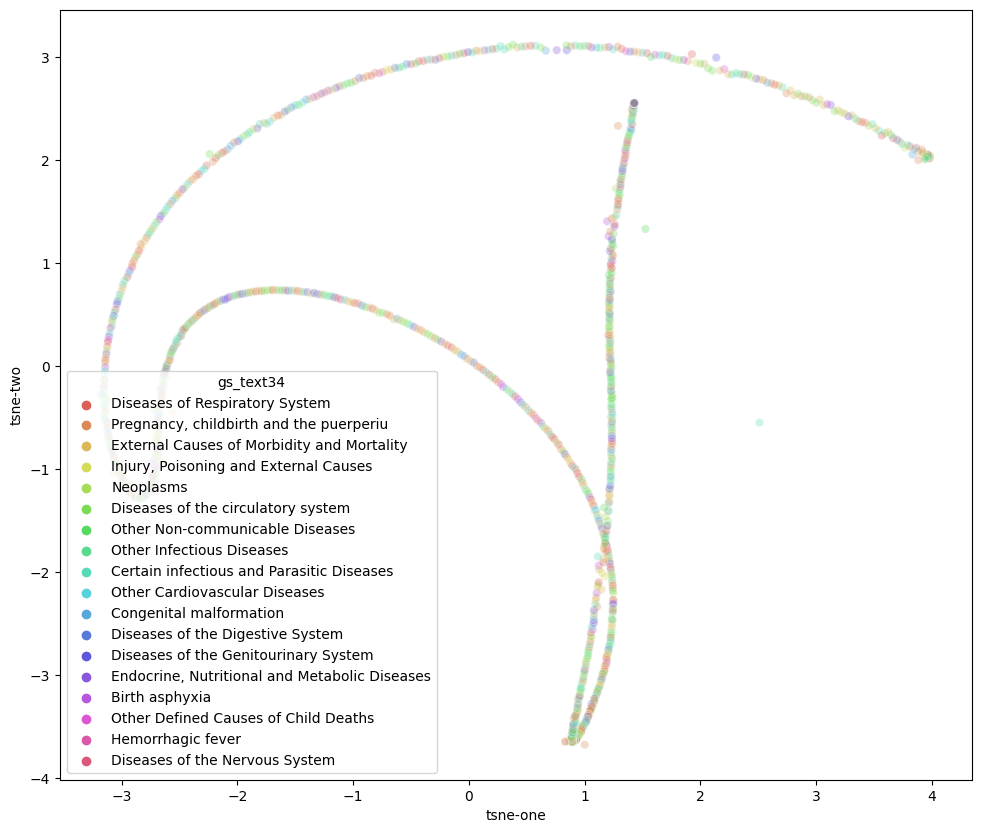

In [41]:
import seaborn as sns

plt.figure(figsize=(40,10))
ax2 = plt.subplot(1, 1, 1)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="gs_text34",
    palette=sns.color_palette("hls", 18),
    data=data_tsn,
    legend="full",
    alpha=0.3,
    ax=ax2
)

<hr>

<h2>Conseguir el numero optimo de clusters</h2>

<h3>Metodo Elbow-index (distorsion e inercia)</h3>

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

def elbow_index(X):
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    K = range(1, 30)

    for k in K:
        # Building and fitting the model
        print('K: ' + str(k))
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
    
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / X.shape[0])
        inertias.append(kmeanModel.inertia_)
    
        mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                    'euclidean'), axis=1)) / X.shape[0]
        mapping2[k] = kmeanModel.inertia_
    
    return mapping1, mapping2, distortions, inertias

In [4]:
import pandas as pd

data = pd.read_csv('data_test_1000/doc_embeding_vector100.csv')
data = data.iloc[:,1:]
mapping1, mapping2, distortions, inertias = elbow_index(data)

K: 1
K: 2
K: 3
K: 4
K: 5
K: 6
K: 7
K: 8
K: 9
K: 10
K: 11
K: 12
K: 13
K: 14
K: 15
K: 16
K: 17
K: 18
K: 19
K: 20
K: 21
K: 22
K: 23
K: 24
K: 25
K: 26
K: 27
K: 28
K: 29


<h4>Distorsion</h4>

In [5]:
f = open('data_test_1000/distortions.txt', 'w')
for key, val in mapping1.items():
    #print(f'{key} : {val}')
    f.write(f'{key} : {val}' + '\n') 

f.close()

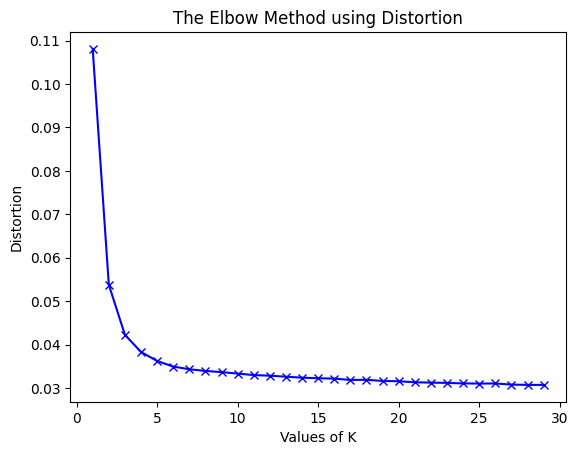

In [7]:
K = range(1, 30)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

<h4>Inercia</h4>

In [10]:
f = open('data_test_1000/inertias.txt', 'w')
for key, val in mapping2.items():
    #print(f'{key} : {val}')
    f.write(f'{key} : {val}' + '\n') 

f.close()

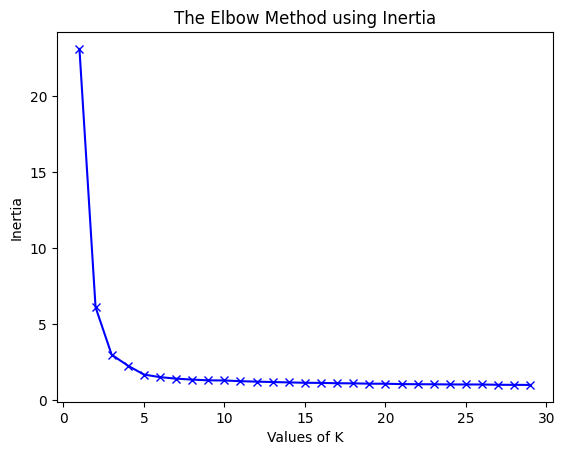

In [11]:
K = range(1, 30)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

<hr>

<h2>K-Means Clustering</h2>

<h3>Funciones auxiliares para el kmeans</h3>

In [20]:
import math
def dist_minkowski(inst1, inst2, alpha):
    # inst1 = (x1, ..., xi, ... xn)
    # inst2 = (z1, ..., zi, ... zn) 
    distancia = 0
    for i in range(len(inst1.columns)): # las 2 instancias tienen la misma longitud
        distancia += pow(abs(inst2.iloc[0, i] - inst1.iloc[0, i]), alpha)
    distancia = pow(distancia, 1 / alpha)
    return distancia

In [21]:
def media(cluster):
    # inicializar lista para luego hacer la media en cada atributo
    #print(cluster)
    lista_atr_centroide = pd.DataFrame(0, index = range(1), columns = range(len(cluster.columns)))
        
    # Suma de todos los valores de cada atributo (cada elemento del array corresponde a un atributo)    
    for i in range(len(cluster)): # Por cada fila (0 <= i < x)
        for j in range(len(cluster.columns)): # Por cada columna (0 <= j < 100)
            lista_atr_centroide.iloc[0, j] += cluster.iloc[i, j]

    
    # Suma de los valores entre la cantidad de instancias (MEDIA)
    for k in range(len(lista_atr_centroide.columns)):
        lista_atr_centroide.iloc[0, k] /= len(cluster)
    return lista_atr_centroide

In [22]:
def silhouette_una_instancia(inst_ind, instancia, clusters, alpha):
    # Averigua a qué cluster pertenece la instancia
    g_j_cluster_ind = pd.read_csv("data_test_1000/asignacion_instancia_cluster_p" + str(alpha) + ".csv").iloc[inst_ind, 1] # g_j = {0, 1, 2}
    g_j_ind = int(g_j_cluster_ind.split()[1])
    g_j = clusters[g_j_ind]
    
    # Calcular la distancia media entre la instancia y las instancias del cluster g_j
    distancia_a = 0
    for i in range(len(g_j)):
        distancia_a += dist_minkowski(instancia, g_j.iloc[[i]], alpha)
        # print("Distancia actual (a) = " + str(distancia_a))    
    if len(g_j) == 1: # El cluster está compuesto sólo por 'intancia'
        a_xi = 0
    else:
        a_xi = 1 / (len(g_j) - 1) * distancia_a

    # Calcular la mínima distancia media entre la instancia y las intancias de los otros clusters
    b_xi = float('inf')
    for cl_ind in range(len(clusters)):
        if cl_ind != g_j_ind: # Sólo se miran los otros clusters
            distancia_b_actual = 0
            for i in range(len(clusters[cl_ind])):
                distancia_b_actual += dist_minkowski(instancia, clusters[cl_ind].iloc[[i]], alpha)
                # print("Distancia actual (b) = " + str(distancia_b_actual))
            b_xi_actual = 1 / (len(clusters[cl_ind])) * distancia_b_actual
            if b_xi_actual < b_xi:
                b_xi = b_xi_actual      

    # Calcular valor del índice de evaluación interna 'Silueta'
    silhouette = (b_xi - a_xi) / max(b_xi, a_xi)
    return silhouette

In [23]:
def inic_aleatoria(datos, num_centroides):
    centroides = datos.sample(n = num_centroides)
    return centroides

In [24]:
def inic_2k_clusters(k, alpha):

    # k = 3 # luego se pasa como parámetro al clustering
    # # Cargar los datos
    # datos_kmeans = pd.read_csv('data_output/doc_embeding.csv')
    # datos_kmeans = datos_kmeans.iloc[:20, 1:]

    #### Inicialización de centroides (Modo 3: 2k clusters --> elegir k centroides más alejados entre sí)

    ## Crear 2k clusters
    num_clusters = 2 * k # 4 clusters
    num_instancias = len(datos_kmeans) # 20 instancias
    tamaño_cluster = num_instancias // num_clusters # 5intancias / cluster
    instancias_restantes = num_instancias % num_clusters # algunos cluster van a ser más grandes si no podemos hacer todos del mismo tamaño
    clusters = []

    print("Número de clusters: " + str(num_clusters))
    print("Número de instancias: " + str(num_instancias))
    print("Tamaño de mínimo de cada cluster: " + str(tamaño_cluster))
    print()

    ind_principio = 0
    ind_final = -1
    for i in range(num_clusters):
        tamaño_def_cluster = tamaño_cluster
        if instancias_restantes > 0:
            tamaño_def_cluster += 1
            instancias_restantes -= 1
        #cluster = datos_kmeans.iloc[tamaño_def_cluster * i:tamaño_def_cluster  * (i + 1)]
        ind_final = ind_principio + tamaño_def_cluster
        cluster = datos_kmeans.iloc[ind_principio:ind_final]
        clusters.append(cluster)
        ind_principio = ind_final
    #print(clusters)

    ## Elegir k centroides más alejados entre sí

    # Calcular los centroides de los cluster que se han creado
    centroides = pd.concat([media(cluster) for cluster in clusters], ignore_index=True)
    #print(centroides)

    # Calcular las distancias medias entre centroides
    dict_dist_cent = {}
    for cent_ind_1 in range(len(centroides)):
        suma_distancias = 0
        for cent_ind_2 in range(len(centroides)):
            cent_1 = centroides.iloc[[cent_ind_1]]
            cent_2 = centroides.iloc[[cent_ind_2]]
            distancia_actual = dist_minkowski(cent_1, cent_2, alpha)
            # print(f"Distancia entre centroide {cent_ind_1} y centroide {cent_ind_2}: {distancia_actual}")
            suma_distancias += distancia_actual
        distancia_media = suma_distancias / len(centroides)
        dict_dist_cent[cent_ind_1] = distancia_media
        #print(f"Distancia media para el centroide {cent_ind_1}: {distancia_media}")
        #print()

    # Ordenar centroides por distancias medias (más alejado - más cercano) [k centroides más lejanos]
    indices_centroides_mas_lejanos = sorted(dict_dist_cent, key=dict_dist_cent.get, reverse=True)[:k] # pone que hay que elegirlo con un parámetro
    #print(indices_centroides_mas_lejanos)

    # Guardar centroides más alejados entre sí
    centroides_mas_lejanos = pd.concat([centroides.iloc[[cent_ind_cercano]] for cent_ind_cercano in indices_centroides_mas_lejanos])
    #print(centroides_mas_lejanos)

    return centroides_mas_lejanos

In [25]:
def sse_un_cluster(cluster, centroide, alpha):
    sse = 0
    for i in range(len(cluster)):
        instancia = cluster.iloc[[i]]
        sse += pow(dist_minkowski(instancia, centroide, alpha), 2)
    return sse

In [26]:
def bss(clusters, centroides, alpha):
    bss = 0
    centroide_general = media(centroides)
    for c_ind in range(len(centroides)):
        centroide_actual = centroides.iloc[[c_ind]]
        bss += len(clusters[c_ind]) * pow(dist_minkowski(centroide_actual, centroide_general, alpha), 2)
        print(f"bss_actual {c_ind} = " + str(len(clusters[c_ind]) * pow(dist_minkowski(centroide_actual, centroide_general, alpha), 2)))
    return bss

<h3>Función para hacer el k-means</h3>

<h4>Cargar los datos</h4>

In [27]:
datos_kmeans = pd.read_csv('data_test_1000/doc_embeding_vector100.csv')
print(datos_kmeans)

     Unnamed: 0         0         1         2         3         4         5  \
0             0 -0.044670  0.024646  0.039249  0.015012  0.063283 -0.074507   
1             1  0.004893 -0.004881 -0.003921 -0.002135 -0.001038 -0.004514   
2             2 -0.001634 -0.001670  0.001991 -0.002502 -0.004013  0.003051   
3             3 -0.003442  0.005849  0.008099 -0.001492  0.004528 -0.007531   
4             4  0.003366  0.004310 -0.001685  0.002033  0.002065 -0.003401   
..          ...       ...       ...       ...       ...       ...       ...   
995         995  0.000542  0.003069  0.001565 -0.002528  0.000447 -0.003967   
996         996 -0.002273  0.003017 -0.003109  0.002645  0.001283  0.004194   
997         997 -0.002875 -0.000714 -0.000527  0.003731 -0.000755  0.001993   
998         998 -0.010162  0.005010  0.016953  0.007860  0.028766 -0.034624   
999         999  0.003414  0.002343  0.001998  0.002701 -0.004374 -0.001099   

            6         7         8  ...        90   

<h4>Implementación de k-means (sin librerías)</h4>

In [28]:
def kmeans_clustering(modo_inic_datos, alpha, int_grup_dist_func, num_iter, num_centroides, datos):

    ## Inicialización de centroides
    if modo_inic_datos == 0: #Inicializar centroides aleatoriamente
        #entroides = datos.sample(n = num_centroides)
        centroides = inic_aleatoria(datos, num_centroides)
    elif modo_inic_datos == 1:
        centroides = inic_2k_clusters(num_centroides, alpha)

    centroides_con_indice = []
    for i in range(num_centroides):
        centroides_con_indice.append( (centroides.iloc[[i]], i + 1) )        
    
    # Para guardar las instancias de cada cluster
    clusters = []
    for i in range(len(centroides)):
        clusters.append(pd.DataFrame())

    # Para guardar la correspondencia instancia-cluster
    asignacion_instancia_cluster = pd.DataFrame(index = list(range(len(datos))), columns = ['cluster', 'instancia'])
    open_response = pd.read_csv("data_test_1000/preproceso.csv")['open_response']
    #open_response = data[0:10]

    # from datetime import datetime
    # instanteInicial = datetime.now()

    ## Definir criterio de convergencia (de momento sólo con 'num_iter')
    for iteracion in range(num_iter):
        #print(f"\nIteración nº {iteracion + 1}")

        # numero_de_cambios = 0

        # Cálculo de distancias entre instancias y centroides.
        # A cada instancia se le asigna el cluster cuyo centroide esté más cerca (alpha = 3)
        for i in range(len(datos)): # por cada frase = [0,02038866, 0.00355687, ...]
            dato = datos.iloc[[i]]
            dist_inst_cent_min = -1 # valor por defecto para decir que todavía no tiene ningún valor
            centroide_min_ind = -1
        
            # Cálculo entre una instancia y todos centroides --> distMin, cluster
            for centroide in centroides_con_indice:
                valores_centroide = centroide[0]
                indice_centroide = centroide[1]   

                if not valores_centroide.empty: # Para evitar problemas en caso de que haya un cluster vacío
                    dist_inst_cent = dist_minkowski(dato, valores_centroide, alpha)
                    if dist_inst_cent_min == -1:
                        dist_inst_cent_min = dist_inst_cent
                        centroide_min_ind = centroide[1]
                    else:
                        if dist_inst_cent < dist_inst_cent_min:
                            dist_inst_cent_min = dist_inst_cent
                            centroide_min_ind = centroide[1]

            # Asignar un cluster a una instancia según la cercanía con los centroides
            frames = [clusters[centroide_min_ind - 1], dato]
            clusters[centroide_min_ind - 1] = pd.concat(frames)

            # if iteracion != 0:                
            #     if int(asignacion_instancia_cluster.iloc[i, 0].split()[1]) != centroide_min_ind - 1:
            #         numero_de_cambios += 1
            
            asignacion_instancia_cluster.iloc[i, 0] = centroide_min_ind - 1
            asignacion_instancia_cluster.iloc[i, 1] = open_response.iloc[i]
            ####print(f"Instancia {i} --> Cluster = {asignacion_instancia_cluster.iloc[i, 0]}")


        for i in range(len(clusters)):
            cluster = clusters[i]
            #print("Cluster" + str(i) + ": " + str(len(cluster)) + str(cluster))

        # instanteFinal = datetime.now()
        # tiempo = instanteFinal - instanteInicial # Devuelve un objeto timedelta
        # segundos = tiempo.seconds
        # print("Tiempo que ha tardado en hacer " + str(iteracion + 1) + " iteraciones: " + str(segundos))
        # print("Número de instancias que han cambiado de cluster: " + str(numero_de_cambios))

        ## Mostrar clusters hasta el momento mediante representación PCA (2D)
        data = pd.read_csv("data_test_1000/doc_embeding_vector100.csv")
        pca = PCA(n_components = 2)
        pca_2d_result = pca.fit_transform(data)
        cluster_ind = asignacion_instancia_cluster.iloc[:, 0]
        for i in range(len(cluster_ind)):
            cluster_ind.loc[i] = f"Cluster {asignacion_instancia_cluster.iloc[i, 0]}"

        data['atr_más_relevante1'] = pca_2d_result[:,0]
        data['atr_más_relevante2'] = pca_2d_result[:,1]
        data['cluster_ind'] = cluster_ind

        data_pca_2d = data.filter(['atr_más_relevante1', 'atr_más_relevante2', 'cluster_ind'])
        pca_2d = px.scatter(data_pca_2d, x='atr_más_relevante1', y='atr_más_relevante2', color='cluster_ind', title=f"\nIteración nº {iteracion + 1}")
        pca_2d.show()
            
        ## Recálcular los centroides
        centroides_con_indice.clear() # se borran los centroides de antes
        for i in range(num_centroides):
            centroide_i = media(clusters[i])
            centroides_con_indice.append( (centroide_i, i + 1) )

        if iteracion != num_iter - 1:
            for i in range(num_centroides):
                clusters[i] = pd.DataFrame()

    ## Resultados
    print()
    print(clusters)

    # Coordenadas de los centroides
    centroides_definitivos_df = pd.concat([centroides_con_indice[i][0] for i in range(len(centroides_con_indice))], ignore_index=True)
    centroides_definitivos_df.to_csv("data_test_1000/centroides_kmeans_p" + str(alpha) + ".csv")

    # Asignacion de las instancias a los clusters
    print("\n")
    for i in range(len(clusters)):
        clusters[i].to_csv(f"data_test_1000/clusters_p{alpha}/cluster{i}.csv")
    print(asignacion_instancia_cluster)
    asignacion_instancia_cluster.to_csv("data_test_1000/asignacion_instancia_cluster_p" + str(alpha) + ".csv")

    # Indicadores internos de la calidad del resultado

    # Calcular valor de siluetas en caso de estar en la última iteración (COSTO COMPUTACIONAL MUY ALTO)
    # silhouettes = []
    # print("\nVALORES SILUETAS:")
    # for i in range(len(datos)):
    #     dato = datos.iloc[[i]]
    #     s = silhouette_una_instancia(i, dato, clusters, alpha)
    #     print(f"Silueta (instancia {i}) = {s}")
    #     silhouettes.append(s)
    # print("\n")
    # print(silhouettes)
    # silhouette_media = sum(silhouettes) / len(silhouettes)
    # print("Silueta media = " + str(silhouette_media))

    # Calcular valores SSE de cada cluster y ExtSSE
    print("Indicadores SSE de cada cluster (Cohesión de cada cluster): ")
    sse = {} # sse_cluster0, sse_cluster1, ..., sse_cluster24
    for i in range(len(centroides_definitivos_df)):
        cluster = clusters[i]
        centroide = centroides_definitivos_df.iloc[[i]]
        sse_actual = sse_un_cluster(cluster, centroide, alpha)
        sse[f'Cluster {i}'] = sse_actual
        print(f"sse_cluster{i} = {sse_actual}")
    print()
    cl_mayor_cohesion = sorted(sse, key=sse.get)
    print(f"Clusters ordenados de mayor a menos cohesión: {cl_mayor_cohesion}")
    sse_total = sum(sse.values())
    print(f"SSE total de la partición = {sse_total}")

    print("\nIndicador BSS (Separabilidad de la partición)")
    bss_total = bss(clusters, centroides_definitivos_df, alpha)
    print(f"BSS total de la partición = {bss_total}")

    #return silhouette_media, silhouettes 

<h2> P=1</h2>

In [13]:
# def kmeans_clustering(modo_inic_datos, alpha, int_grup_dist_func, num_iter, num_centroides, datos):
kmeans_clustering(1, 1, 0, 5, 25, datos_kmeans)

Número de clusters: 50
Número de instancias: 1000
Tamaño de mínimo de cada cluster: 20




[     Unnamed: 0         0         1         2         3         4         5  \
980         980  0.002238 -0.004813 -0.002541  0.004770 -0.000084 -0.001999   
981         981 -0.012572  0.010687  0.021247 -0.000913  0.040653 -0.034523   
982         982 -0.003397  0.004798 -0.002415  0.000466 -0.002492 -0.001786   
983         983  0.003711 -0.000476 -0.001882  0.004866 -0.004983  0.000577   
984         984  0.004160 -0.001374 -0.001911 -0.003151  0.000326  0.002702   
985         985 -0.009658  0.009260  0.011465  0.001057  0.022074 -0.011637   
986         986  0.001067 -0.001278  0.001031  0.002286  0.001354  0.001851   
987         987  0.002331  0.001018  0.003884 -0.004837 -0.002922 -0.004076   
988         988 -0.002133 -0.000827 -0.001770  0.003304 -0.003307 -0.003008   
989         989 -0.000011 -0.004629 -0.000091  0.003094 -0.004306 -0.000646   
990         990 -0.009080  0.020494  0.015914  0.007041  0.049376 -0.040949   
991         991 -0.013193  0.010915  0.026730 -0.0

<h2> P=2</h2>

In [ ]:
# def kmeans_clustering(modo_inic_datos, alpha, int_grup_dist_func, num_iter, num_centroides, datos):
siluetas = kmeans_clustering(1, 2, 0, 5, 25, datos_kmeans)

<h2> P=7.5</h2>

In [ ]:
# def kmeans_clustering(modo_inic_datos, alpha, int_grup_dist_func, num_iter, num_centroides, datos):
siluetas = kmeans_clustering(1, 7.5, 0, 5, 25, datos_kmeans)

<hr>

<h2>Asignar clase mayoritaria a los cluster obtenidos en k-Means</h2>

In [101]:
def asignar_clase2cluster(pathCluster, pathData):
    
    data_cluster = pd.read_csv(pathCluster)
    #data_cluster = data_cluster.iloc[:,1:]
    data = pd.read_csv(pathData)

    claseMayoritaria = ''
    clases = {}

    for instance in data_cluster.iterrows():
        indexInstance = instance[1][0]
        clase = data.iloc[[indexInstance]]
        clase = clase['gs_text34'].iat[0]

        if clase not in clases:
            clases[clase] = 0
        else:
            clases[clase] += 1
    
    claseMayoritaria = max(clases, key=clases.get)

    return claseMayoritaria

In [106]:
def asignar_clusters(nClusters):

    df = pd.DataFrame(index=range(nClusters),columns=range(2))

    pathOriginal = 'data_output/preproceso.csv'

    for i in range(0,nClusters):

        path = "data_cluster/cluster" + str(i) + ".csv"

        clase = asignar_clase2cluster(path, pathOriginal)

        df.iloc[i] = [i,clase]

        print(str(i) + ' :' + str(clase))

    df.to_csv('data_output/clusters.csv')

In [107]:
asignar_clusters(3)

0 :Other Non-communicable Diseases
1 :Diseases of Respiratory System
2 :Pregnancy, childbirth and the puerperiu


In [108]:
pathOriginal = 'data_output/preproceso.csv'
data = pd.read_csv(pathOriginal)
data.head(10)

,Unnamed: 0,module,age,sex,site,open_response,gs_text34
0,0,Adult,65.0,1,Bohol,date felt lower back pain fever went hospital ...,Diseases of Respiratory System
1,1,Child,0.0,2,Dar,caese death pneumonia,Diseases of Respiratory System
2,2,Adult,23.0,2,AP,took wife private hospital tubectomy time wa p...,"Pregnancy, childbirth and the puerperiu"
3,3,Adult,40.0,1,AP,went work sunday iron rod brother person went ...,External Causes of Morbidity and Mortality
4,4,Adult,55.0,1,UP,deceased died due snake bite deceased regained...,"Injury, Poisoning and External Causes"
5,5,Neonate,0.0,1,Bohol,june year respondent experienced pain upper po...,"Pregnancy, childbirth and the puerperiu"
6,6,Child,4.0,2,AP,consult doctor saw patient said wa critical co...,Neoplasms
7,7,Adult,73.0,1,UP,deceased suffering coughing since month death ...,Diseases of the circulatory system
8,8,Adult,54.0,2,Bohol,wa admitted hospital wa found ha toxic goiter ...,Other Non-communicable Diseases
9,9,Adult,15.0,2,UP,deceased ill year treatment wa ongoing private...,Other Infectious Diseases


<hr>

<h2>Representacion post-kmeans</h2>

<h3>Representacion grafica</h3>

In [ ]:
from sklearn.manifold import TSNE

#try: data
#except NameError: data = pd.read_csv("data_output/doc_embeding.csv")

data = pd.read_csv("data_output/doc_embeding.csv")
data = data.iloc[:10, 1:]


tsne = TSNE(n_components=3, verbose=1, perplexity=5, n_iter=250)
tsne_results = tsne.fit_transform(data)
tsne_results

In [ ]:
label = pd.read_csv("data_output/asignacion_instancia_cluster.csv")
clstr = pd.read_csv("data_output/clusters.csv")

label = label['cluster']

for i in range(len(label)):
    label[i] = clstr.at[label[i],'1']
label

In [ ]:
data['tsne-one'] = tsne_results[:,0]
data['tsne-two'] = tsne_results[:,1]
data['tsne-three'] = tsne_results[:,2]
data['gs_text34'] = label
data_tsn = data.filter(['tsne-one', 'tsne-two','tsne-three','gs_text34'])
data_tsn.to_csv('data_graphics/data_tsne_post.csv')
data_tsn

In [ ]:
import plotly.express as px

pca_3d = px.scatter_3d(data_tsn, x='tsne-one', y='tsne-two', z='tsne-three', color='gs_text34')
pca_3d.show()

In [ ]:
import seaborn as sns

plt.figure(figsize=(14,10))
ax2 = plt.subplot(1, 1, 1)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="gs_text34",
    palette=sns.color_palette("hls", 5),
    data=data_tsn,
    legend="full",
    alpha=0.3,
    ax=ax2
)

<hr>

<h2>Asignar cluster a cualquier frase</h2>

In [29]:
def cargar_centroides(path):
    data = pd.read_csv(path)
    data = data.iloc[:,1:]

    centroides = {}

    for i in range(len(data.index)):
        centroides[i] = data.iloc[[i]]

    return centroides

In [30]:
from gensim.models.doc2vec import Doc2Vec

def cargar_modelo(path):
    model = Doc2Vec.load(path)
    return model

In [31]:
def preproceso(txt):
    txt = to_minusculas(txt)
    txt = quitar_marcasPuntuacion(txt)
    txt = extender_contracciones(txt)
    txt = to_minusculas(txt)
    txt = lematizar_palabras(txt)
    txt = quitar_stopwords(txt)
    txt = quitar_espaciosExtra(txt)

    return txt
      

In [90]:
def asignar_cluster_str(word, idioma='en'):

    word = str(word)

    if idioma == 'es':
        word = traducir_esp2ing('en')

    #centroides = cargar_centroides('data_output/centroides_kmeans.csv')
    centroides = cargar_centroides('data_test_1000/centroides_kmeans_p1.csv')
    modelo = cargar_modelo('model/doc2vec.model')

    dataACS = preproceso(word)

    words = dataACS.split(" ")

    pos_word = modelo.infer_vector(words)
    pos_word_df = pd.DataFrame(columns=list(range(100)), index = list(range(1)))
    for i in range(len(pos_word_df.columns)):
        pos_word_df.iloc[0, i] = pos_word[i]

    distancias = {}
    for idx, centroide in centroides.items():
        dst = dist_minkowski(pos_word_df,centroide,3)
        distancias[idx] = dst

    index_min = min(distancias, key=distancias.get) 

    print(f'A la instancia introducida se le ha asignado el cluster {index_min} a una distancia de {distancias[index_min]}')

    return index_min, pos_word_df

In [91]:
#asignar_cluster_str('Texto a analizar para probar que cluster se le asigna, en ingles', 'es')
asignar_cluster_str('the death occurred due to burning')

A la instancia introducida se le ha asignado el cluster 1 a una distancia de 9.502630004596359


(1,
            0            1           2           3           4           5   \
 0 -0.00262981  0.000108799 -0.00432538  0.00120763 -0.00301176 -0.00207335   
 
            6           7           8           9   ...          90  \
 0  0.00336187  0.00253076 -0.00265443  0.00299167  ... -0.00413463   
 
            91          92          93          94          95          96  \
 0  0.00265865  0.00329079 -0.00151673  0.00353442 -0.00148415  0.00183853   
 
             97          98           99  
 0  0.000148517 -0.00143599 -2.88212e-05  
 
 [1 rows x 100 columns])

<hr>

<h2>Documentos similares para cualquier frase</h2>

In [92]:
def docs_similares(word, idioma='en'):

    word = str(word)

    cluster_asignado, posicion_instancia = asignar_cluster_str('Texto a analizar para probar que cluster se le asigna, en ingles', idioma)

    #data_path = "data_cluster/cluster" + str(cluster_asignado) + ".csv"
    data_path = f"data_test_1000/clusters_p1/cluster{cluster_asignado}.csv"
    data_pos = pd.read_csv(data_path)
    y = data_pos.loc[0]
    data_pos.drop(data_pos.columns[[0, 1]], axis=1, inplace=True)
    # print("data_pos: ")
    # print(data_pos)
    # print(f"y: {y}")
    #y = list(range(len(data_pos)))

    distancias = {}
    idx = 0
    #for instance in data_pos.iterrows():
    for i in range(len(data_pos)):
        instancia = data_pos.iloc[[i]]
        # print(instancia)
        # print(posicion_instancia)
        dst = dist_minkowski(instancia,posicion_instancia, 3)
        #distancias[y[idx]] = dst
        distancias[i] = dst
        #idx += 1

    print(f"distancias: {distancias}")
    masSimilares = sorted(distancias, key=distancias.get, reverse=True)[:5] # Los 5 documentos más similares
    print(f"distancias ordenadas: {masSimilares}")

    #for key, value in distancias.items:
    documentos_similares = {}
    open_response = pd.read_csv("data_output/preproceso.csv")['open_response']
    print(type(open_response))
    for key in masSimilares:
        documentos_similares[key] = open_response.loc[key]
        #distancias[key] = data[key]['open_response']

    #return distancias
    return documentos_similares

In [93]:
#clase, docs = docs_similares('la muerte la cuaso una quemadura del incendio', 'es')
#clase, docs = docs_similares('the death occurred due to burning', 'en')
docs = docs_similares('opinion think deceased wa suffering malaria pnemonia,Certain infectious and Parasitic Diseases', 'en')
# print(f"\n{docs}")
for key, value in docs.items():
    print(f"{key}: {value}")

A la instancia introducida se le ha asignado el cluster 1 a una distancia de 9.498216072240616
distancias: {0: 0.2894177629887626, 1: 0.022156084145730844, 2: 0.0209518993135575, 3: 0.052036995019061665, 4: 0.022987874847685, 5: 0.020314210933578117, 6: 0.32195844084276076, 7: 0.024086905569295415, 8: 0.02000752085956079, 9: 0.024146785006379096, 10: 0.02248180685473221, 11: 0.022590070433552906, 12: 0.021590892026916587, 13: 0.02166766451290316, 14: 0.023520143033757143, 15: 0.020215030861085604, 16: 0.021319850402162468, 17: 0.020855503203821513, 18: 0.02373272292262463, 19: 0.02210014433286426}
distancias ordenadas: [6, 0, 3, 9, 7]
<class 'pandas.core.series.Series'>
6: consult doctor saw patient said wa critical conditon told u go x ray scanning blood test test wa told u go bone marrow test hospital test wa done wa revealed blood cancer order make confirm told u go place went hospital place used go operation ward daily went week wa confirmed cancer bone marrow test told u wa alread